# Primera Práctica Aprendizaje Estadístico

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Leemos los datos
college = pd.read_csv('College.csv')

# Ejercicio 1

In [3]:
# Mostramos los datos
college

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [4]:
# Leemos los datos usando la columna de los nombres como índice
college2 = pd.read_csv('College.csv', index_col=0)
# Obtenemos lo mismo que en college2, el dataframe con el nombre como índice pero de otra manera
college3 = college.rename({'Unnamed: 0': 'College'},
axis=1)
college3 = college3.set_index('College')

In [5]:
college = college3

In [6]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


array([[<Axes: xlabel='Top10perc', ylabel='Top10perc'>,
        <Axes: xlabel='Apps', ylabel='Top10perc'>,
        <Axes: xlabel='Enroll', ylabel='Top10perc'>],
       [<Axes: xlabel='Top10perc', ylabel='Apps'>,
        <Axes: xlabel='Apps', ylabel='Apps'>,
        <Axes: xlabel='Enroll', ylabel='Apps'>],
       [<Axes: xlabel='Top10perc', ylabel='Enroll'>,
        <Axes: xlabel='Apps', ylabel='Enroll'>,
        <Axes: xlabel='Enroll', ylabel='Enroll'>]], dtype=object)

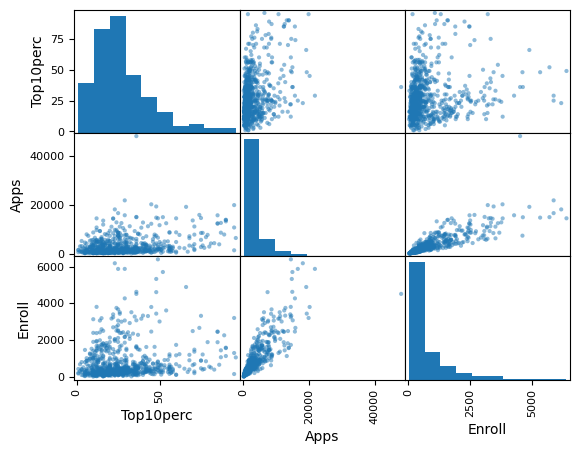

In [7]:
pd.plotting.scatter_matrix(college[['Top10perc', 'Apps', 'Enroll']])

Nos reservamos el análisis de este boxplot para el ejercicio 2

<Axes: title={'center': 'Outstate'}, xlabel='[Private]'>

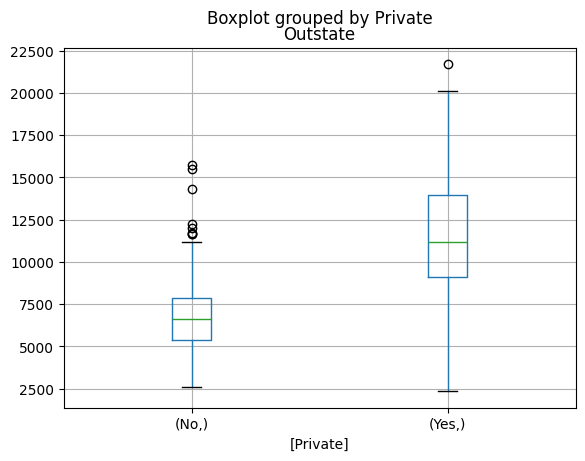

In [8]:
college.boxplot(['Outstate'], ['Private'])

In [9]:
college['Elite'] = pd.cut(college['Top10perc'],
[0, 50, 100],
labels=['No', 'Yes'])

In [10]:
college['Elite'].value_counts()

Elite
No     699
Yes     78
Name: count, dtype: int64

<Axes: title={'center': 'Outstate'}, xlabel='[Elite]'>

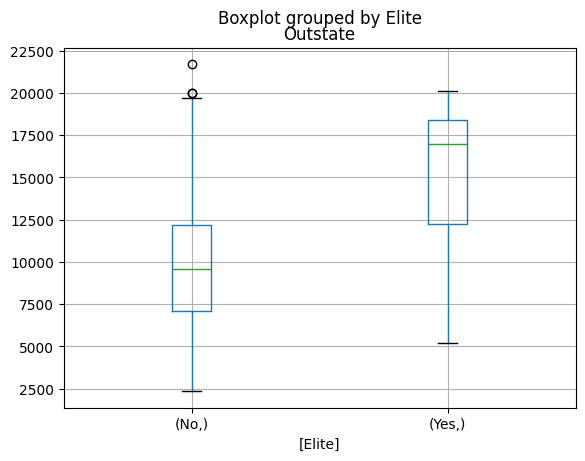

In [11]:
college.boxplot(['Outstate'], ['Elite'])

<Axes: >

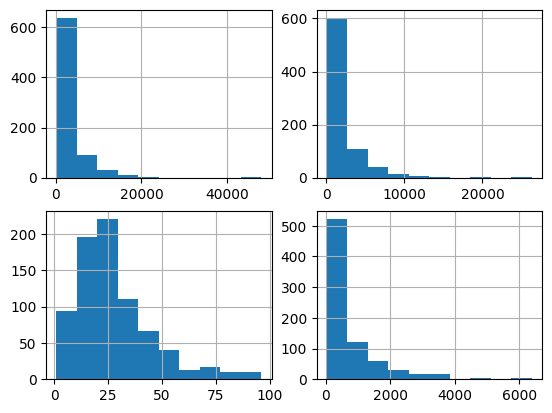

In [12]:
fig, ax = plt.subplots(2, 2)
college['Apps'].hist(ax=ax[0, 0])
college['Accept'].hist(ax=ax[0][1])
college['Enroll'].hist(ax=ax[1][1])
college['Top10perc'].hist(ax=ax[1][0])

Primero vamos a visualizar los tipos de datos.

Para empezar podemos ver que tenemos dos columnas con valores categóricos, `Private` que nos indica si la universidad es privada o no, y `Elite` que es la variable que creamos antes.

El resto de variables son enteros excepto `S.F.Ratio`, el Student/faculty ratio, que es flotante

In [13]:
college.head(1)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite
College,,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,No


In [14]:
college.dtypes

Private          object
Apps              int64
Accept            int64
Enroll            int64
Top10perc         int64
Top25perc         int64
F.Undergrad       int64
P.Undergrad       int64
Outstate          int64
Room.Board        int64
Books             int64
Personal          int64
PhD               int64
Terminal          int64
S.F.Ratio       float64
perc.alumni       int64
Expend            int64
Grad.Rate         int64
Elite          category
dtype: object

Vamos a comprobar si hay valores nulos

In [15]:
college.isna().sum()

Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
Elite          0
dtype: int64

Buenas noticias, no hay valores nulos

# Ejercicio 2

## Repaso de los modelos de Regresión Logística y LDA

No tiene sentido ponernos con la práctica si no entendemos los modelos que vamos a utilizar en detalle. Por eso vamos a hacer un estudio de dichos modelos, para tenerlos frescos a la hora de ponernos a programar y saber que es lo que estamos haciendo

### Regresión Logística

Descripción general:

Modelo de clasificación binaria (dos clases, 0 y 1) que estima la probabilidad de que la instancia que le pasemos pertenezca a la clase que definamos como 1

- Hiperparámetros: ninguno
- Parámetros: coeficientes para cada predictor e intercepto
- Modelo (para un solo predictor):

![logreg](./logreg.png)

- Algoritmo: elegir coeficientes que maximizen la estimación por máxima verosimilitud

![maxlik](./maxlik.png)

Consideraciones prácticas:

- Supone relación lineal entre los predictores y el logit de la probabilidad
- Es sensible a multicolinealidad entre variables predictoras


### Análisis lineal discriminante

Descripción general:

Modela P(X|Y) con los discriminantes. Para predecir una instancia calculamos su discriminante para todas las clases y asignamos la clase cuyo discriminante sea mayor

Hiperparámetros: ninguno
- Parámetros: medias de cada clase, matriz de covarianza común y coeficientes lineales para la función discriminante
- Modelo: el discriminante para cada clase

![LDA](./LDA.png)

![LDA2](./LDA2.png)

![LDA3](./LDA3.png)

- Algoritmo: estimar medias y covarianza de cada clase, y construir discriminantes

![LDA4](./LDA4.png)

Consideraciones prácticas:
- Supone que las variables predictoras son aproximadamente normales y las clases tienen covarianzas similares

### Implementación en python

Para implementar regresión logística, las dos librerías principales son `scikit-learn` y `statsmodels`. Esta última está más orientada al análisis estadístico que al aprendizaje automático. Ofrece resúmenes detallados, pruebas de significancia, p-valores y coeficientes interpretables. Además es la que se usa en las prácticas de ejemplo. Por lo cual vamos a usar esa.

[Documentación de regresión logística en statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.Logit.html)

Curiosamente si leemos la documentación, vemos que si queremos que el modelo tenga intercepto tenemos que añadirlo nosotros poniendo una columna de unos. Hay que tener eso en cuenta.

Para regresión logística múltiple es el mismo modelo pero le añadimos más variables.

Para implementar análisis lineal discriminante vamos a usar `scikit-learn`, más adelante entramos en detalle en la implementación

### Estudio inicial

El ejercicio nos pide aplicar regresión logística y LDA para clasificar la variable Private. Primero usando Outstate y luego usando Outstate, Top10perc y F.Undergrad

Por lo tanto lo primero va a ser estudiar dichas variables. Antes hemos echo un análisis de propósito general, pero ahora nos vamos a centrar en estas

- Private: A factor with levels No and Yes indicating private or public university
- Outstate: Out-of-state tuition
- Top10perc: Pct. new students from top 10% of H.S. class
- F.Undergrad: Number of fulltime undergraduates

In [16]:
df_2 = college[['Outstate', 'Top10perc', 'F.Undergrad', 'Private']].copy(deep=True)

df_2

,Outstate,Top10perc,F.Undergrad,Private
College,,,,
Abilene Christian University,7440,23,2885,Yes
Adelphi University,12280,16,2683,Yes
Adrian College,11250,22,1036,Yes
Agnes Scott College,12960,60,510,Yes
Alaska Pacific University,7560,16,249,Yes
...,...,...,...,...
Worcester State College,6797,4,3089,No
Xavier University,11520,24,2849,Yes
Xavier University of Louisiana,6900,34,2793,Yes


In [17]:
# Vamos a ver los valores únicos de Private, al ser esta cualitativa. Nos aseguramos que solo sea Yes y No
df_2['Private'].unique()

array(['Yes', 'No'], dtype=object)

In [18]:
# Convertir 'Private' a 1 (Yes) y 0 (No)
df_2['Private_bin'] = df_2['Private'].map({'Yes': 1, 'No': 0})

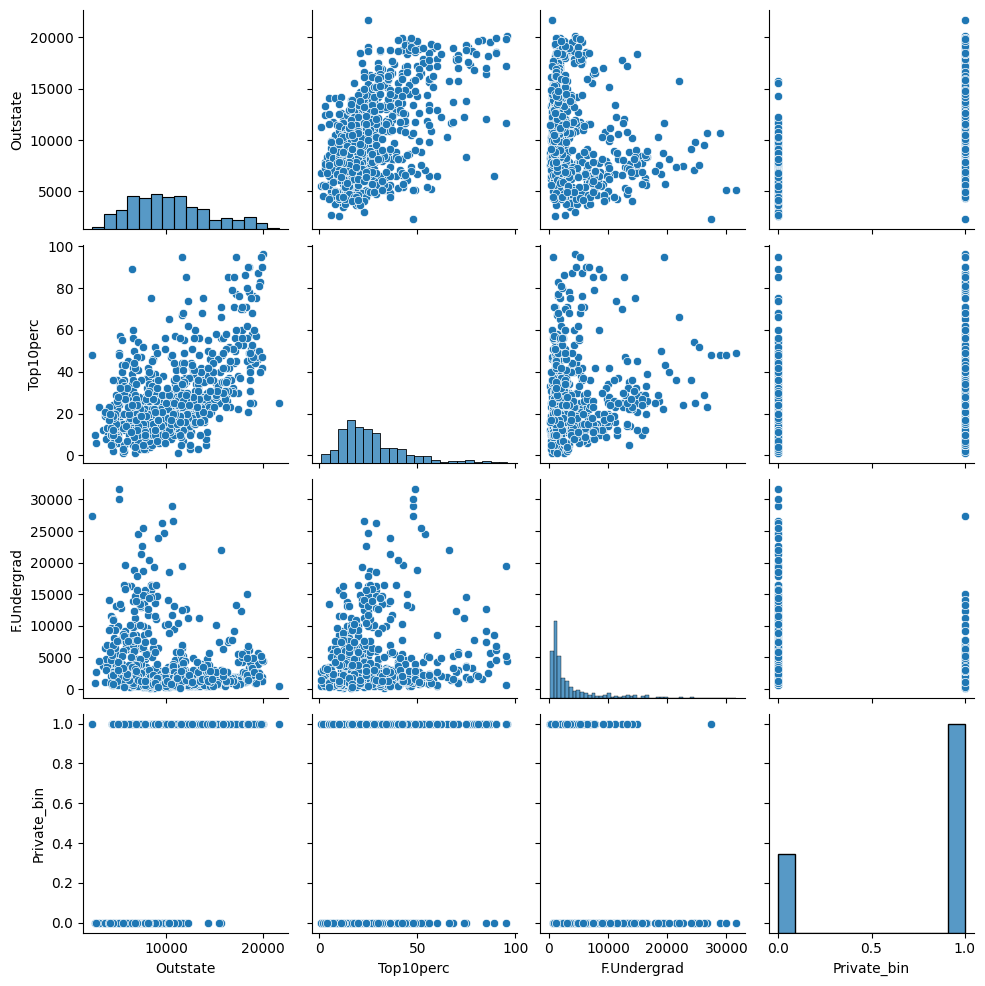

In [19]:
sns.pairplot(df_2)

### 2a Utilizando Outstate

#### Regresión Logística

In [20]:
import statsmodels.api as sm
import numpy as np

In [21]:
# Agregar constante (intercepto)
X = sm.add_constant(df_2['Outstate'])
y = df_2['Private_bin']

# Ajustar modelo de regresión logística
modelo = sm.Logit(y, X).fit()

# Ver resumen
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.369942
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            Private_bin   No. Observations:                  777
Model:                          Logit   Df Residuals:                      775
Method:                           MLE   Df Model:                            1
Date:                Tue, 11 Nov 2025   Pseudo R-squ.:                  0.3688
Time:                        14:28:08   Log-Likelihood:                -287.45
converged:                       True   LL-Null:                       -455.37
Covariance Type:            nonrobust   LLR p-value:                 5.093e-75
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5221      0.409    -11.045      0.000      -5.325      -3.720
Outstate       0.0006   4.96e

**Outstate = 0.0006**  
Por cada dólar adicional en el costo para estudiantes de fuera del estado, el *log-odds* de que una universidad sea privada **aumenta 0.0006**.

Si lo pasamos a **odds ratio**:  
\( e^{0.0006} = 1.0006 \)

Es decir, por cada dólar más, las probabilidades de ser privada aumentan aproximadamente un **0.06%**.  
Si pensamos en miles de dólares:  
\( e^{0.0006 \times 1000} \approx 1.82 \)

→ Esto implica un **aumento del 82%** en las probabilidades por cada incremento de **$1000** en “Outstate”.  
Como el **p-valor es 0.000**, el efecto es **estadísticamente significativo**.

- El predictor **Outstate** es **altamente significativo** (*p* < 0.001).  
- El **Pseudo R² = 0.3688** indica un **ajuste razonablemente bueno**.  
- A medida que aumenta el costo “Outstate”, **aumenta la probabilidad de que una universidad sea privada**.

Esto esta bien para interpretar los datos, pero también queremos ver si usar una regresión logística con Outstate es buena idea a la hora de predecir. Para hacer eso vamos a dividir en conjuntos de entrenamiento y testeo y compararemos el error de test y el error de validación con CV

In [22]:
# Validación cruzada (Cross-validation) manual con statsmodels
def cross_val_accuracy_statsmodels(X, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    scores = []

    for train_idx, val_idx in kf.split(X):
        X_fold_train, X_fold_val = X.iloc[train_idx], X.iloc[val_idx]
        y_fold_train, y_fold_val = y.iloc[train_idx], y.iloc[val_idx]

        # Agregar constante
        X_fold_train_const = sm.add_constant(X_fold_train)
        X_fold_val_const = sm.add_constant(X_fold_val)

        # Ajustar modelo
        modelo_fold = sm.Logit(y_fold_train, X_fold_train_const).fit(disp=0)  # disp=0 para no mostrar salida

        # Predecir
        y_fold_pred = (modelo_fold.predict(X_fold_val_const) > 0.5).astype(int)
        acc = accuracy_score(y_fold_val, y_fold_pred)
        scores.append(acc)

    return np.array(scores)


def test_logistic_regression(X, y):

    # Mezclar los datos antes de dividir
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Agregar constante solo al conjunto de entrenamiento
    X_train_const = sm.add_constant(X_train)
    X_test_const = sm.add_constant(X_test)

    # Ajustar modelo de regresión logística en el conjunto de entrenamiento
    modelo = sm.Logit(y_train, X_train_const).fit()

    # Ver resumen del modelo
    print("Resumen del modelo:")
    print(modelo.summary())

    # Predicciones en entrenamiento y testeo
    y_train_pred = (modelo.predict(X_train_const) > 0.5).astype(int)
    y_test_pred = (modelo.predict(X_test_const) > 0.5).astype(int)

    # Calcular precisión en entrenamiento y testeo
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f"\nPrecisión en entrenamiento: {train_acc:.4f}")
    print(f"Precisión en testeo: {test_acc:.4f}")


    cv_scores = cross_val_accuracy_statsmodels(X_train, y_train, cv=5)

    print(f"\nPrecisión promedio con CV (5-fold): {cv_scores.mean():.4f}")
    print(f"Desviación estándar de CV: {cv_scores.std():.4f}")

    # Devolver las predicciones y los valores reales
    return {
        'y_train_true': y_train,
        'y_train_pred': y_train_pred,
        'y_test_true': y_test,
        'y_test_pred': y_test_pred,
        'modelo': modelo
    }

In [23]:
X = df_2[['Outstate']]  # Usamos doble corchete para que sea un DataFrame
y = df_2['Private_bin']
r = test_logistic_regression(X, y)

Optimization terminated successfully.
         Current function value: 0.372698
         Iterations 8
Resumen del modelo:
                           Logit Regression Results                           
Dep. Variable:            Private_bin   No. Observations:                  621
Model:                          Logit   Df Residuals:                      619
Method:                           MLE   Df Model:                            1
Date:                Tue, 11 Nov 2025   Pseudo R-squ.:                  0.3633
Time:                        14:28:08   Log-Likelihood:                -231.45
converged:                       True   LL-Null:                       -363.52
Covariance Type:            nonrobust   LLR p-value:                 2.140e-59
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4739      0.459     -9.751      0.000      -5.373      -3.575
Outstate 

Aunque entrenemos con menos datos el modelo sigue siendo practicamente el mismo. El coeficiente para `Outstate` sigue siendo el mismo, 0.0006. Y el intercepto también es muy parecido.

Respecto a los errores, vemos que son muy parecidos: El modelo falla un 17% de las veces

Vamos a estudiar también las matrices de confusión

In [24]:
def plot_confusion_matrix(resultados, title=" "):
    y_true = resultados['y_test_true']
    y_pred = resultados['y_test_pred']
    
    # Matriz de confusión normalizada por filas (clases reales)
    cm_norm = confusion_matrix(y_true, y_pred, normalize='true')
    cm_abs  = confusion_matrix(y_true, y_pred)

    # Calcular error por clase: 1 - diagonal (tasa de acierto)
    error_per_class = 1 - cm_norm.diagonal()

    # Etiquetas de clase (asumimos clases 0 y 1, pero se puede generalizar)
    classes = np.unique(y_true)
    
    # Crear anotaciones combinadas: conteo absoluto + porcentaje
    annot = np.empty_like(cm_abs, dtype=object)
    for i in range(cm_abs.shape[0]):
        for j in range(cm_abs.shape[1]):
            count = cm_abs[i, j]
            pct = cm_norm[i, j] * 100
            annot[i, j] = f"{count}\n({pct:.1f}%)"

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_abs, annot=annot, fmt='', cmap='Blues', cbar=True,
                xticklabels=classes, yticklabels=classes)
    if title == " ":
        plt.title('Matriz de Confusión - Conjunto de Test\n(Conteo y % del total por clase real)')
    else:
        plt.title(title)
    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')
    plt.tight_layout()
    plt.show()

    # Mostrar porcentaje de error por clase
    print("\nPorcentaje de error por clase (sobre el total de esa clase):")
    for i, cls in enumerate(classes):
        print(f"Clase {cls}: {error_per_class[i]*100:.2f}% de error")

In [25]:
pd.crosstab(r['y_test_pred'], r['y_test_true'])

Private_bin,0,1
row_0,,
0,28,10
1,15,103


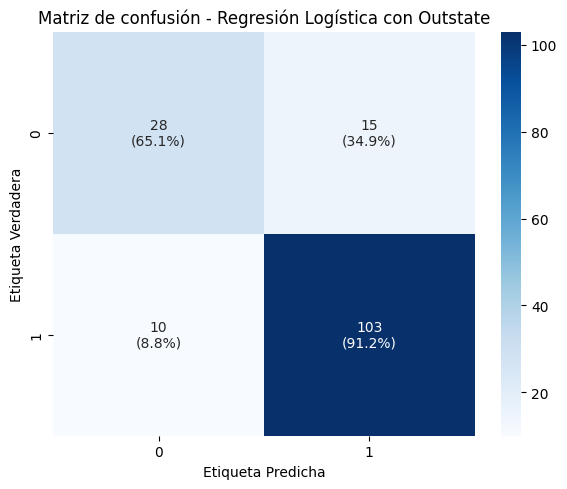


Porcentaje de error por clase (sobre el total de esa clase):
Clase 0: 34.88% de error
Clase 1: 8.85% de error


In [26]:
plot_confusion_matrix(r, "Matriz de confusión - Regresión Logística con Outstate")

Vemos que el modelo predice mejor las que son privadas de las que no son privadas. Probablemente porque en el conjunto de entrenamiento la mayoría de universidades son privadas. Vamos a comprobar

In [27]:
df_2['Private_bin'].value_counts()

Private_bin
1    565
0    212
Name: count, dtype: int64

Efectivamente, hay 2.6 veces más privadas que públicas. Nos encontramos ante un problema de clases desbalanceadas

#### LDA

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# https://scikit-learn.org/stable/modules/lda_qda.html#lda

In [29]:
X_cols = ['Outstate']

covs = {}
for c in [0, 1]:
    Xc = df_2[df_2['Private_bin'] == c][X_cols]
    covs[c] = np.cov(Xc, rowvar=False)

for c, cov in covs.items():
    print(f"Covarianza clase {c}:\n{cov}\n")

Covarianza clase 0:
4602090.650697487

Covarianza clase 1:
13745339.893667232



Recordar que LDA asume que las variables predictores siguen una distribución mas o menos normal y que las clases tienen la misma matriz de covarianza.

Si recordamos el pairplot que hicimos en el estudio inicial, veremos que `Outstate` y `Top10perc` si que mas o menos siguen una distribución normal. Por otro lado, `F.Undergrad` esta sesgado a la derecha.

Además las matrices de convarianza difieren bastante, LDA no es el mejor modelo para nuestros datos

In [30]:
lda1 = LDA(store_covariance=True) 
lda1.fit(df_2[['Outstate']], df_2['Private_bin'])

,solver,'svd'
,shrinkage,None
,priors,None
,n_components,None
,store_covariance,True
,tol,0.0001
,covariance_estimator,None


Si recordamos los parámetros que estima LDA

![LDA4](./LDA4.png)

Los tenemos en el modelo:

In [31]:
print(f"Probabilidades para cada clase (contar): {lda1.priors_}")
print(f"Media empírica de cada clase: {lda1.means_}")
print(f"Covarianza, se supone que para cada clase es la misma pero ya vimos que no {lda1.covariance_}")

Probabilidades para cada clase (contar): [0.27284427 0.72715573]
Media empírica de cada clase: [[ 6813.41037736]
 [11801.69380531]]
Covarianza, se supone que para cada clase es la misma pero ya vimos que no [[11227043.53581144]]


Si vamos a la [documentación](https://scikit-learn.org/stable/modules/lda_qda.html#lda) vemos que scikit-learn modela lo mismo pero lo expresa de manera más compacta como una ecuación lineal. De ahí es de donde salen los parámetros coef_ e intercept_

![ldasckit](./LDAsckit.png)

In [32]:
print(f"Coeficiente: {lda1.coef_}")
print(f"Intercepto: {lda1.intercept_}")

Coeficiente: [[0.00044317]]
Intercepto: [-3.14455084]


In [33]:
def cross_val_accuracy_lda(X, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    scores = []

    for train_idx, val_idx in kf.split(X):
        X_fold_train, X_fold_val = X.iloc[train_idx], X.iloc[val_idx]
        y_fold_train, y_fold_val = y.iloc[train_idx], y.iloc[val_idx]

        # Ajustar modelo LDA
        lda_fold = LDA(store_covariance=True)
        lda_fold.fit(X_fold_train, y_fold_train)

        # Predecir
        y_fold_pred = lda_fold.predict(X_fold_val)
        acc = accuracy_score(y_fold_val, y_fold_pred)
        scores.append(acc)

    return np.array(scores)

def test_lda(X, y):

    # Mezclar los datos antes de dividir
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Ajustar modelo LDA en el conjunto de entrenamiento
    lda = LDA(store_covariance=True)
    lda.fit(X_train, y_train)

    # Predicciones en entrenamiento y testeo
    y_train_pred = lda.predict(X_train)
    y_test_pred = lda.predict(X_test)

    # Calcular precisión en entrenamiento y testeo
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f"\nPrecisión en entrenamiento: {train_acc:.4f}")
    print(f"Precisión en testeo: {test_acc:.4f}")

    cv_scores = cross_val_accuracy_lda(X_train, y_train, cv=5)

    print(f"\nPrecisión promedio con CV (5-fold): {cv_scores.mean():.4f}")
    print(f"Desviación estándar de CV: {cv_scores.std():.4f}")

    # Devolver las predicciones y el modelo
    return {
        'y_train_true': y_train,
        'y_train_pred': y_train_pred,
        'y_test_true': y_test,
        'y_test_pred': y_test_pred,
        'modelo': lda
    }

In [34]:
X = df_2[['Outstate']]
y = df_2['Private_bin']

resultados = test_lda(X, y)


Precisión en entrenamiento: 0.8341
Precisión en testeo: 0.8397

Precisión promedio con CV (5-fold): 0.8310
Desviación estándar de CV: 0.0213


In [35]:
pd.crosstab(resultados['y_test_pred'], resultados['y_test_true'])

Private_bin,0,1
row_0,,
0,27,9
1,16,104


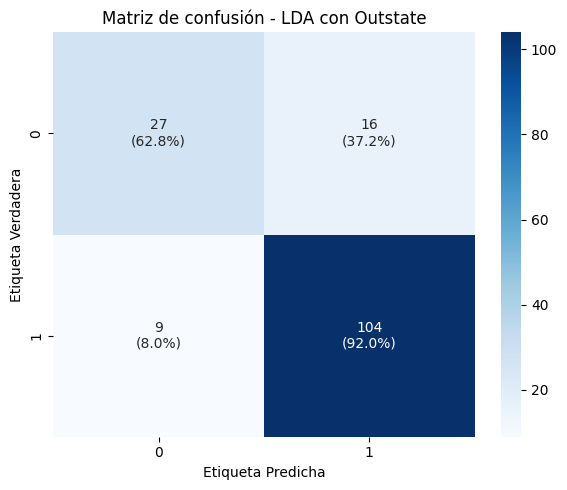


Porcentaje de error por clase (sobre el total de esa clase):
Clase 0: 37.21% de error
Clase 1: 7.96% de error


In [36]:
plot_confusion_matrix(resultados, "Matriz de confusión - LDA con Outstate")

A pesar de que las covarianzas de cada clase no sean iguales no lo hace tan tan mal. De hecho es bastante parecido a la regresión logística solo con `Outstate`

### 2b Utilizando Outstate, Top10perc y F.Undergrad

In [37]:
df_2[['Outstate', 'F.Undergrad', 'Top10perc', 'Private_bin']].corr()

,Outstate,F.Undergrad,Top10perc,Private_bin
Outstate,1.000000,-0.215742,0.562331,0.552650
F.Undergrad,-0.215742,1.000000,0.141289,-0.615561
Top10perc,0.562331,0.141289,1.000000,0.164132
Private_bin,0.552650,-0.615561,0.164132,1.000000


- Las universidades privadas tienden a tener **mayor matrícula “Outstate”** y **menor cantidad de estudiantes de pregrado**.
- `Top10perc` No parece que explique tanto si la universidad es privada variable como las otras dos. Además tiene una relación de 0.5 con Outstate, lo cual no es bueno para nuestros modelos

#### Regresión logística

In [38]:
X = df_2[['Outstate', 'Top10perc', 'F.Undergrad']]  # Usamos doble corchete para que sea un DataFrame
y = df_2['Private_bin']
r = test_logistic_regression(X, y)

Optimization terminated successfully.
         Current function value: 0.190985
         Iterations 9
Resumen del modelo:
                           Logit Regression Results                           
Dep. Variable:            Private_bin   No. Observations:                  621
Model:                          Logit   Df Residuals:                      617
Method:                           MLE   Df Model:                            3
Date:                Tue, 11 Nov 2025   Pseudo R-squ.:                  0.6737
Time:                        14:28:09   Log-Likelihood:                -118.60
converged:                       True   LL-Null:                       -363.52
Covariance Type:            nonrobust   LLR p-value:                7.610e-106
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.3449      0.595     -5.622      0.000      -4.511      -2.179
Outsta

##### 1. Resultados del modelo

| Variable | Coeficiente | p-valor | Interpretación |
|-----------|--------------|----------|----------------|
| **Outstate** | +0.0007 | < 0.001 | A mayor matrícula fuera del estado, mayor probabilidad de ser privada. |
| **Top10perc** | +0.0211 | 0.118 | No significativo al 5%. |
| **F.Undergrad** | -0.0006 | < 0.001 | A mayor número de estudiantes de pregrado, menor probabilidad de ser privada. |

##### 2. Magnitud del efecto (odds ratio)

| Variable | Exp(coef) | Efecto aproximado |
|-----------|------------|-------------------|
| Outstate | **1.0007** | Cada $1000 de aumento en matrícula → odds × 1.78 (+78%). |
| F.Undergrad | **0.9994** | Cada 1000 estudiantes adicionales → odds × 0.55 (-45%). |
| Top10perc | **1.0213** | Cada punto adicional en % del top 10 → odds × 1.02 (no significativo). |

##### 3. Calidad del modelo

- **Pseudo R²:** 0.6737 → alto, el modelo explica bien la variable dependiente.
- **Precisión en entrenamiento:** 0.9404  
- **Precisión en testeo:** 0.9487  
- **Precisión promedio CV (5-fold):** 0.9405 ± 0.0229  

El modelo generaliza bien y no muestra signos de sobreajuste. Vemos el perfil típico de universidades, universidades privadas con menos alumnos y cobran más para estudiantes fuera del estado, universidades públicas más baratas y con más alumnos


Vamos a estudiar si quitando `Top10perc` el modelo sigue siendo igual de bueno. Lo cual viendo los datos debería ser así

In [39]:
X = df_2[['Outstate', 'F.Undergrad']]  # Usamos doble corchete para que sea un DataFrame
y = df_2['Private_bin']
r = test_logistic_regression(X, y)

Optimization terminated successfully.
         Current function value: 0.192943
         Iterations 9
Resumen del modelo:
                           Logit Regression Results                           
Dep. Variable:            Private_bin   No. Observations:                  621
Model:                          Logit   Df Residuals:                      618
Method:                           MLE   Df Model:                            2
Date:                Tue, 11 Nov 2025   Pseudo R-squ.:                  0.6704
Time:                        14:28:09   Log-Likelihood:                -119.82
converged:                       True   LL-Null:                       -363.52
Covariance Type:            nonrobust   LLR p-value:                1.451e-106
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.1364      0.564     -5.564      0.000      -4.241      -2.032
Outsta

Efectivamente, el modelo es prácticamente el mismo

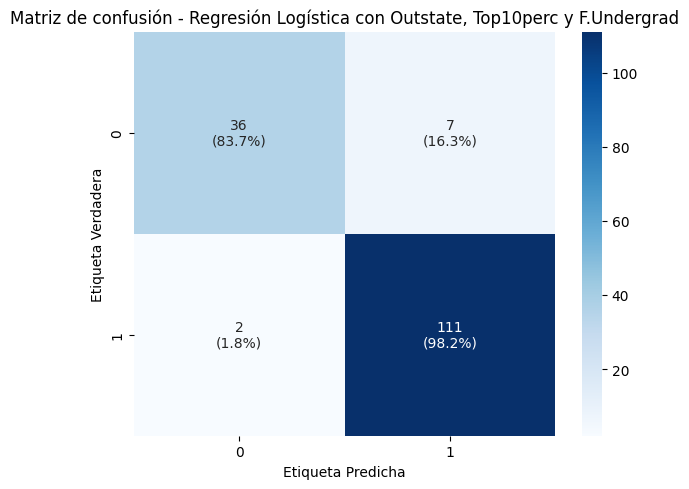


Porcentaje de error por clase (sobre el total de esa clase):
Clase 0: 16.28% de error
Clase 1: 1.77% de error


In [40]:
plot_confusion_matrix(r, "Matriz de confusión - Regresión Logística con Outstate, Top10perc y F.Undergrad")

El mejor modelo hasta ahora

#### LDA

In [41]:
X_cols = ['Outstate', 'Top10perc', 'F.Undergrad']

covs = {}
for c in [0, 1]:
    Xc = df_2[df_2['Private_bin'] == c][X_cols]
    covs[c] = np.cov(Xc, rowvar=False)

for c, cov in covs.items():
    print(f"Covarianza clase {c}:\n{cov}\n")

Covarianza clase 0:
[[4.60209065e+06 1.30116321e+04 4.89306467e+06]
 [1.30116321e+04 2.61806738e+02 4.41588207e+04]
 [4.89306467e+06 4.41588207e+04 4.18310927e+07]]

Covarianza clase 1:
[[1.37453399e+07 4.11829402e+04 1.51061879e+06]
 [4.11829402e+04 3.18672177e+02 1.20070081e+04]
 [1.51061879e+06 1.20070081e+04 4.45489312e+06]]



In [42]:
for c1 in [0, 1]:
    for c2 in [0, 1]:
        # Usamos la distancia de Frobenius para calcular la distancia entre matrices
        diff = np.linalg.norm(covs[c1] - covs[c2], ord='fro')
        print(f"Diferencia entre {c1} y {c2}: {diff:.4f}")

Diferencia entre 0 y 0: 0.0000
Diferencia entre 0 y 1: 38774538.4908
Diferencia entre 1 y 0: 38774538.4908
Diferencia entre 1 y 1: 0.0000



Precisión en entrenamiento: 0.9130
Precisión en testeo: 0.9038

Precisión promedio con CV (5-fold): 0.9115
Desviación estándar de CV: 0.0175


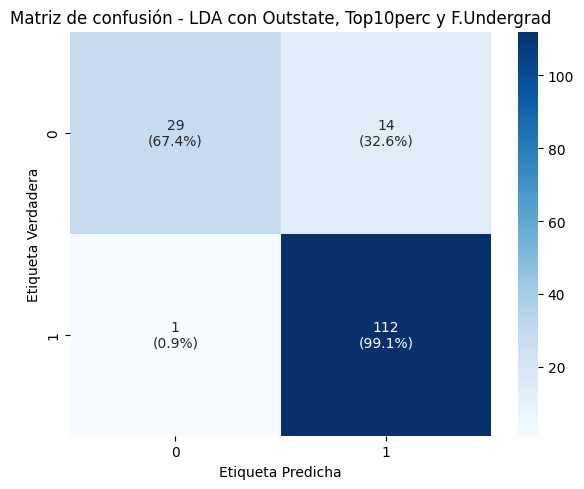


Porcentaje de error por clase (sobre el total de esa clase):
Clase 0: 32.56% de error
Clase 1: 0.88% de error


In [43]:
X = df_2[['Outstate', 'Top10perc', 'F.Undergrad']]  # Usamos doble corchete para que sea un DataFrame
y = df_2['Private_bin']
r = test_lda(X, y)
plot_confusion_matrix(r, "Matriz de confusión - LDA con Outstate, Top10perc y F.Undergrad")

Ya sabemos que `Top10perc` sobra


Precisión en entrenamiento: 0.9130
Precisión en testeo: 0.9038

Precisión promedio con CV (5-fold): 0.9115
Desviación estándar de CV: 0.0175


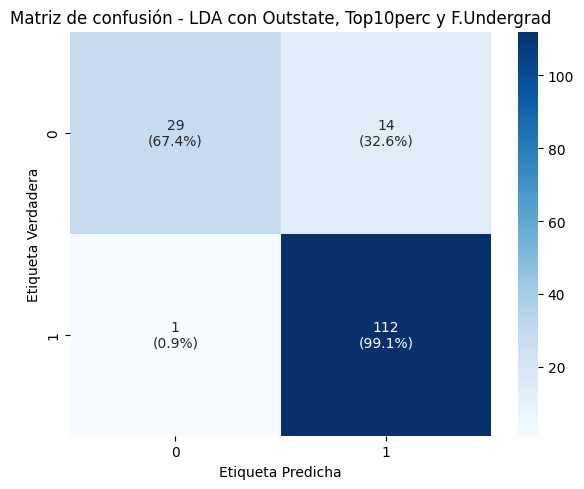


Porcentaje de error por clase (sobre el total de esa clase):
Clase 0: 32.56% de error
Clase 1: 0.88% de error


In [44]:
X = df_2[['Outstate', 'F.Undergrad']]  # Usamos doble corchete para que sea un DataFrame
y = df_2['Private_bin']
r = test_lda(X, y)
plot_confusion_matrix(r, "Matriz de confusión - LDA con Outstate, Top10perc y F.Undergrad")

Regresión logística es mejor, con un acierto True Negative de 83.7%, mientras que LDA tiene un acierto True Negative de 67.4%. Y como hemos visto predecir No (0) bien es lo más importante, al estar las clasees desbalanceadas. Probablemente no sea tan bueno por el tema de las covarianzas

### Conclusiones

- Tenemos clases desbalanceadas, por lo que el verdadero reto en nuestro caso es predecir bien si una universidad NO es privada
- Por cada dólar que aumenta la matrícula para estudiantes fuera del estado, las probabilidades de ser privada aumentan un 0.06%
- Las universidades privadas tienden a tener **mayor matrícula “Outstate”** y **menor cantidad de estudiantes de pregrado**.
- `Top10perc` esta linealmente relacionada con `Outstate`, y no explica bien la variable objetivo
- Perfil típico de universidades, universidades privadas con menos alumnos y cobran más para estudiantes fuera del estado, universidades públicas más baratas y con más alumnos
- El mejor modelo es Regresión Logística con `Outstate` y `F.Undergrad`

# EJERCICIO 3

Regularización, PCR y PLS. Ejercicio 9 del capítulo 6 del libro, página 286. Además de lo pedido en el
ejercicio, justifica si es necesario o no el uso de estas metodologías frente el modelo de regresión lineal
por mínimos cuadrados.

## Pasos previos

En primer lugar, cargaremos tanto las librerías que necesitamos como el Dataset a partir del cual realizaremos este ejercicio.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sklearn.model_selection as skm
from statsmodels.api import OLS
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Para una mejor compresión de los datos, cambiamos la columna de Unnamed: 0 a University.

In [46]:
College = pd.read_csv('College.csv')
College = College.rename(columns={'Unnamed: 0': 'University'})
College

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


Podemos observar que, a diferencia de algunas de las prácticas que hemos realizado, en este Dataset todas las variables tienen la misma cantidad de datos, lo que nos facilita el trabajo.

In [47]:
College.shape

(777, 19)

Es el mismo dataset que hemos usado para los ejercicios anteriores

## Apartado a) Test y Train
Pasamos ahora a realizar el primer apartado, en el que simplemente definiremos los conjuntos Test y Train.

Cogeremos 4/5 del conjunto de datos para entrenar y dejaremos 1/5 para el test.

In [48]:
College_clean = College.drop('University', axis=1).copy()

# One-hot encoding 'Private' (Yes/No -> 1/0)
College_clean['Private'] = (College_clean['Private'] == 'Yes').astype(int)

X = College_clean.drop('Apps', axis=1)

# Como los modelos de statsmodel no añaden el intercepto lo añadimos nosotros directamente al dataframe
X['intercept'] = 1.0

y = College_clean['Apps']

X_train, X_test, y_train, y_test = skm.train_test_split(X, y, test_size=0.2, random_state=1)

## Apartado b) Regresión lineal múltiple

En este apartado, tal y como nos pide el enunciado, vamos a obtener MSE para el modelo usando regresión lineal.



In [49]:
results = OLS(y_train, X_train).fit()
pred = results.predict(X_test)
# Calculamos Mean Squared Error a mano
ols_MSE_test = np.mean((pred - y_test)**2)
print(f"OLS Test MSE: {ols_MSE_test:.2f}")

OLS Test MSE: 640045.03


A continuación vemos los resultados de la regresión lineal, para verlos más comodamente vamos a crear un Dataframe con todos los datos que nos devuelve el modelo y el VIF para cada variable

In [50]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

# conf_int para obtener los intervalos de confianza de cada variable
conf = results.conf_int()
coef_df = pd.DataFrame({
    'coef': results.params,
    'std_err': results.bse,
    't': results.tvalues,
    'p>|t|': results.pvalues,
    'conf_low': conf[0],
    'conf_high': conf[1]
})

# Calcular VIF para cada columna
vifs = []
for i in range(X_train.shape[1]):
    try:
        vifs.append(VIF(X_train.values, i))
    except Exception:
        vifs.append(np.inf)
vif_df = pd.DataFrame({'VIF': vifs}, index=X_train.columns)

merged = coef_df.merge(vif_df, left_index=True, right_index=True, how='left')
# Eliminamos la columna de unos que creamos para que el modelo tuviera intercepto
merged = merged.drop('intercept', axis=0)

merged_sorted = merged.sort_values('VIF', ascending=False)

print("Regression summary with VIF (sorted by VIF):")
display(merged_sorted)

Regression summary with VIF (sorted by VIF):


,coef,std_err,t,p>|t|,conf_low,conf_high,VIF
Enroll,-0.746077,0.229853,-3.245887,1.235724e-03,-1.197486,-0.294667,20.978869
F.Undergrad,0.052458,0.039693,1.321596,1.868038e-01,-0.025495,0.130412,17.822661
Top10perc,50.218691,6.707523,7.486921,2.513877e-13,37.045748,63.391635,7.297953
Accept,1.575937,0.046321,34.021954,2.037921e-142,1.484966,1.666907,6.407354
Top25perc,-14.946563,5.412531,-2.761474,5.929351e-03,-25.576264,-4.316863,5.822658
Outstate,-0.101565,0.022883,-4.438385,1.077812e-05,-0.146505,-0.056624,4.320747
PhD,-8.851477,5.377593,-1.645993,1.002864e-01,-19.412563,1.709609,3.789717
Terminal,-1.580112,5.935861,-0.266198,7.901780e-01,-13.237584,10.077359,3.680611
Expend,0.082175,0.014120,5.819755,9.576650e-09,0.054445,0.109906,2.912067
Private,-355.479131,164.818013,-2.156798,3.141596e-02,-679.166195,-31.792067,2.807611


Estos valores obtenidos nos muestran mediante el VIF, que las variables de 'Enroll' y 'F.Undergrand' nos dan problemas de colinealidad, lo que se traducirá a problemas del modelo lineal a la hora de predecir la variable 'Apps'. Un número mayor que 10 en el VIF de una variable nos da a entender que esa variable no se podrá predecir correctamente con una regresión lineal.

Correlaciones absolutas con Apps:
 Accept         0.943451
Enroll         0.846822
F.Undergrad    0.814491
Private        0.432095
P.Undergrad    0.398264
PhD            0.390697
Terminal       0.369491
Top25perc      0.351640
Top10perc      0.338834
Expend         0.259592
Personal       0.178731
Room.Board     0.164939
Grad.Rate      0.146755
Books          0.132559
S.F.Ratio      0.095633
perc.alumni    0.090226
Outstate       0.050159
dtype: float64


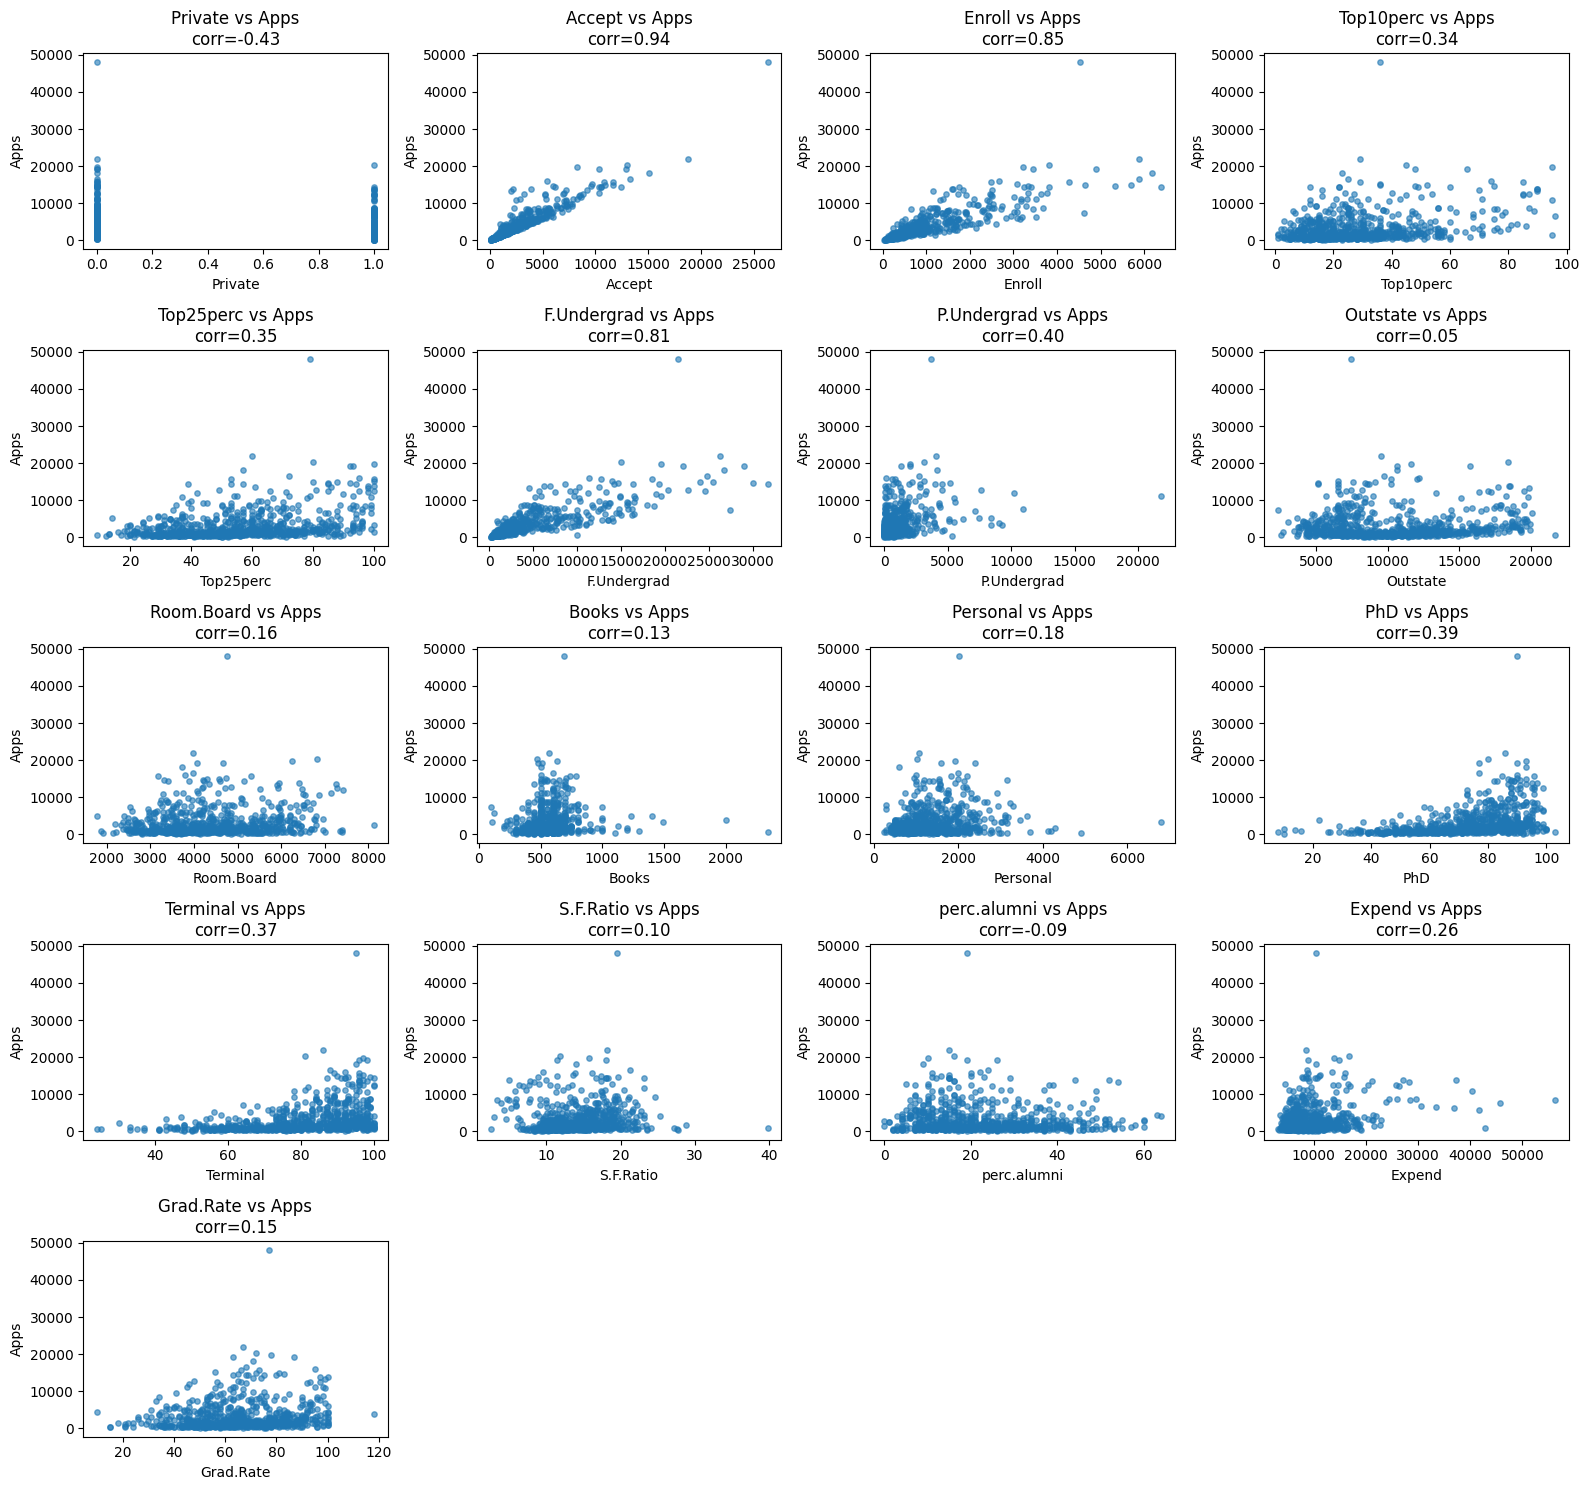

In [51]:
# Mostrar correlaciones de cada predictor con Apps (valor absoluto, ordenado)
predictors = X.drop('intercept', axis=1, errors='ignore') 
corrs = predictors.corrwith(y).abs().sort_values(ascending=False)
print("Correlaciones absolutas con Apps:\n", corrs)

# Graficar cada predictor vs Apps en una rejilla de subplots
cols = predictors.columns.tolist()
n = len(cols)
ncols = 4
nrows = int(np.ceil(n / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 3*nrows), squeeze=False)
for i, col in enumerate(cols):
    r = i // ncols
    c = i % ncols
    axes[r, c].scatter(predictors[col], y, s=15, alpha=0.6)
    axes[r, c].set_xlabel(col)
    axes[r, c].set_ylabel('Apps')
    axes[r, c].set_title(f'{col} vs Apps\ncorr={predictors[col].corr(y):.2f}')
# Quitar ejes vacíos
for j in range(i+1, nrows*ncols):
    r = j // ncols
    c = j % ncols
    axes[r, c].axis('off')
plt.tight_layout()
plt.show()

Como podemos ver en las gráficas, son muchas de las variables las que no tienen una correlación elevada respecto a 'Apps', por lo que el método de regresión lineal no parece que vaya a ser el mejor método para hacer la predicción de dicha variable.

## Apartado c)  Ridge Regression

La regresión Ridge es una extensión de la regresión lineal tradicional que incorpora una penalización sobre el tamaño de los coeficientes. Esta penalización, conocida como término L2, evita que los coeficientes crezcan demasiado cuando las variables predictoras están altamente correlacionadas entre sí. En lugar de eliminar variables, Ridge reduce la magnitud de todos los coeficientes, estabilizando el modelo y mejorando su capacidad de generalización. Es especialmente útil cuando hay multicolinealidad y se desea mantener todas las variables en el modelo.

Pasamos a explicar qúe hace el modelo de Ridge y cómo lo vamos a usar en esta práctica.

Queremos ver cual es el parámetro lambda de Ridge que más nos interesa, para eso, sacamos 100 números desde 1000 hasta 10^6.5
Esto lo hacemos para poder ver los cambios producidos en este modelo, al igual que lo usaremos en el de Lasso, al ser parámetros que cambian drásticamente.

In [52]:
#Definimos una malla de lambdas:
K=5
lambdas=np.logspace(-3, 6.5, 100) 
#100 números espaciados logarítmicamente entre 10^(-3) y 10^(6.5)
lambdas

array([1.00000000e-03, 1.24726747e-03, 1.55567614e-03, 1.94034425e-03,
       2.42012826e-03, 3.01854726e-03, 3.76493581e-03, 4.69588196e-03,
       5.85702082e-03, 7.30527154e-03, 9.11162756e-03, 1.13646367e-02,
       1.41747416e-02, 1.76796941e-02, 2.20513074e-02, 2.75038784e-02,
       3.43046929e-02, 4.27871275e-02, 5.33669923e-02, 6.65629135e-02,
       8.30217568e-02, 1.03550337e-01, 1.29154967e-01, 1.61090788e-01,
       2.00923300e-01, 2.50605097e-01, 3.12571585e-01, 3.89860370e-01,
       4.86260158e-01, 6.06496477e-01, 7.56463328e-01, 9.43512101e-01,
       1.17681195e+00, 1.46779927e+00, 1.83073828e+00, 2.28342030e+00,
       2.84803587e+00, 3.55226249e+00, 4.43062146e+00, 5.52617002e+00,
       6.89261210e+00, 8.59693087e+00, 1.07226722e+01, 1.33740403e+01,
       1.66810054e+01, 2.08056754e+01, 2.59502421e+01, 3.23668929e+01,
       4.03701726e+01, 5.03524031e+01, 6.28029144e+01, 7.83320322e+01,
       9.77009957e+01, 1.21859274e+02, 1.51991108e+02, 1.89573565e+02,
      

Visualizos entonces, usando una Pipeline, estos valores, a partir de los cuales obtendremos el mejor alpha, que será el mejor factor por el cual llevar a cabo el modelo de Ridge para obtener los coeficientes de cada una de las variables.

In [53]:
# Para K-Fold, NO usar store_cv_values/store_cv_results con cv!=None (incompatible)
inner_kfold = skm.KFold(n_splits=K,
               shuffle=True,
               random_state=2)
scaler = StandardScaler() #Esta línea la hemos añadido para estandarizar los datos
#de tal forma que no haya variables con más peso que otras por su escala
ridge_cv = RidgeCV(alphas=lambdas, cv=inner_kfold)  # sin store_cv_values
pipeCVRidge = Pipeline([('scaler', scaler),
                ('ridge', ridge_cv)])

# Eliminar 'intercept' para entrenar con sklearn, ya lo añade por defecto al contrario que statsmodels
X_train_nointerc = X_train.drop('intercept', axis=1, errors='ignore')
X_test_nointerc = X_test.drop('intercept', axis=1, errors='ignore')

pipeCVRidge.fit(X_train_nointerc, y_train )


,steps,"[('scaler', ...), ('ridge', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alphas,array([1.0000...16227766e+06])
,fit_intercept,True
,scoring,None
,cv,KFold(n_split... shuffle=True)


In [54]:
#  Ver resultados: ojo! Ridge_cv no te da los mse's, al menos que uses uses LOOC con store_cv_values=True.
# Importante: como ajustamos con un Pipeline (scaler -> ridge), hay que evaluar con ese mismo pipeline
print("Mejor alpha:", pipeCVRidge.named_steps['ridge'].alpha_)
print("Score en test (R^2):", pipeCVRidge.score(X_test_nointerc, y_test))  # R^2 en el conjunto de test usando el pipeline correcto sin 'intercept'

Mejor alpha: 0.4862601580065353
Score en test (R^2): 0.954880987426181


In [55]:
# Coeficientes
print("Intercepto (constante):", ridge_cv.intercept_)
coef_matrix = ridge_cv.coef_
print(pd.Series(coef_matrix, index=X_train_nointerc.columns))

Intercepto (constante): 3023.523349436393
Private        -159.690311
Accept         3774.753761
Enroll         -623.249556
Top10perc       882.102055
Top25perc      -286.811564
F.Undergrad     234.988724
P.Undergrad      19.435619
Outstate       -402.520729
Room.Board      196.598055
Books            -7.780889
Personal         13.457504
PhD            -140.304237
Terminal        -23.264824
S.F.Ratio        71.729365
perc.alumni      -3.399131
Expend          438.225754
Grad.Rate       154.513498
dtype: float64


Quitamos la variable creada 'intercept' y ordenamos los coeficientes obtenidos

In [56]:
pd.Series(ridge_cv.coef_, index=X.drop('intercept', axis=1, errors='ignore').columns).sort_values(ascending=False)

Accept         3774.753761
Top10perc       882.102055
Expend          438.225754
F.Undergrad     234.988724
Room.Board      196.598055
Grad.Rate       154.513498
S.F.Ratio        71.729365
P.Undergrad      19.435619
Personal         13.457504
perc.alumni      -3.399131
Books            -7.780889
Terminal        -23.264824
PhD            -140.304237
Private        -159.690311
Top25perc      -286.811564
Outstate       -402.520729
Enroll         -623.249556
dtype: float64

In [57]:
# Calcular MSE con datos de test usando datos sin 'intercept'
ridge_pred_all = pipeCVRidge.predict(X_test_nointerc)
ridge_MSE = mean_squared_error(y_test, ridge_pred_all)
print(f"Ridge MSE (all test data, sin intercept): {ridge_MSE:.2f}")
ridge_MSE

Ridge MSE (all test data, sin intercept): 641646.43


641646.4261105298

## Apartado d) Lasso Regression

La regresión Lasso también agrega una penalización a la regresión lineal, pero en este caso el castigo es la suma de los valores absolutos de los coeficientes (penalización L1). Este tipo de regularización no solo controla el sobreajuste, sino que además puede llevar algunos coeficientes exactamente a cero, eliminando efectivamente las variables menos relevantes. Por esta razón, Lasso es muy útil cuando se busca un modelo más simple y fácil de interpretar, ya que realiza selección automática de variables.

In [58]:
from sklearn.linear_model import LassoCV

Al igual que en el modelo de Ridge, en Lasso también en primer lugar obtenemos los alphas mediante un barrido de números separados logarítmicamente desde 10^-3 hasta 10^6.5. Realmente este modelo es bastante parecido al anteiror modelo, con la diferencia de que en esta ocasión modificamos el cuadrado de los predictores, es decir, no multiplicamos de manera lineal estos, sino que elevamos dicha penalización a nuestro modelo al cuadrado.

Obtenemos los aphas mediante validación cruzada(CV):

In [59]:
lasso_cv = LassoCV(alphas=lambdas, cv=inner_kfold, max_iter=10000, random_state=42)  # sin store_cv_values
pipeCVLasso = Pipeline([('scaler', scaler),
                ('lasso', lasso_cv)])

pipeCVLasso.fit(X_train_nointerc, y_train )


,steps,"[('scaler', ...), ('lasso', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,eps,0.001
,n_alphas,'deprecated'
,alphas,array([1.0000...16227766e+06])
,fit_intercept,True


Obtenemos igual que amtes el mejor alpha y coeficientes

In [60]:
# --- Mejor alpha y score en test ---
print("Mejor alpha (Lasso):", pipeCVLasso.named_steps['lasso'].alpha_)
print("Score en test (R^2):", pipeCVLasso.score(X_test_nointerc, y_test))

Mejor alpha (Lasso): 13.374040261108215
Score en test (R^2): 0.9514477960110745


In [61]:
# --- Intercepto y coeficientes (del estimador dentro del pipeline) ---
lasso_est = pipeCVLasso.named_steps['lasso']
print("Intercepto (constante):", lasso_est.intercept_)
coefs = pd.Series(lasso_est.coef_, index=X_train_nointerc.columns)
print("Coeficientes:")
print(coefs)

Intercepto (constante): 3023.523349436393
Coeficientes:
Private        -140.872855
Accept         3611.789611
Enroll         -206.947207
Top10perc       696.875761
Top25perc      -139.054333
F.Undergrad       0.000000
P.Undergrad       2.493744
Outstate       -333.346152
Room.Board      173.472880
Books             0.000000
Personal          0.000000
PhD            -111.161108
Terminal        -22.610267
S.F.Ratio        49.196336
perc.alumni     -10.220038
Expend          412.951653
Grad.Rate       115.285147
dtype: float64


In [62]:
# Opcional: ordenar y ver sparsidad (variables seleccionadas)
print("\n# Coeficientes (ordenados desc):")
print(coefs.sort_values(ascending=False))
n_zero = (coefs == 0).sum()
n_nz   = (coefs != 0).sum()
print(f"\nVariables con coef!=0 (seleccionadas): {n_nz}  |  coef=0: {n_zero}")


# Coeficientes (ordenados desc):
Accept         3611.789611
Top10perc       696.875761
Expend          412.951653
Room.Board      173.472880
Grad.Rate       115.285147
S.F.Ratio        49.196336
P.Undergrad       2.493744
Personal          0.000000
F.Undergrad       0.000000
Books             0.000000
perc.alumni     -10.220038
Terminal        -22.610267
PhD            -111.161108
Top25perc      -139.054333
Private        -140.872855
Enroll         -206.947207
Outstate       -333.346152
dtype: float64

Variables con coef!=0 (seleccionadas): 14  |  coef=0: 3


In [63]:
# --- MSE en test usando el pipeline ---
y_pred_lasso = pipeCVLasso.predict(X_test_nointerc)
lasso_MSE = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso MSE (test): {lasso_MSE:.2f}")
lasso_MSE

Lasso MSE (test): 690470.52


690470.5221177789

In [64]:
print("MSE del modelo Ridge anterior: ")
ridge_MSE

MSE del modelo Ridge anterior: 


641646.4261105298

Vemos que los resultados obtenidos son bastante peores que en el anterior modelo. Esto nos dice que este modelo de penalización es el peor para el tipo de problema que estamos intentando solucionar. Por lo que si utilizamos uno de ellos, usaremos Ridge. No obstante, a continuación, veremos los modelos de PLS y PCR.

## Apartado e) PLS Regression

El modelo PLS (Regresión de Mínimos Cuadrados Parciales) crea nuevas variables llamadas componentes latentes, que son combinaciones lineales de las variables originales y se construyen maximizando su capacidad de predecir la variable respuesta. A diferencia de métodos puramente basados en los predictores, PLS tiene en cuenta tanto la estructura de X como la relación con Y, lo que lo hace muy potente cuando las variables independientes están fuertemente correlacionadas o cuando el número de predictores es muy grande. Su objetivo principal es encontrar las direcciones en el espacio de los datos que expliquen mejor la covarianza entre X e Y.

In [65]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA

El modelo a realizar en este apartado y en el siguiente se simplifica bastante, puesto que simplemento definimos la regresión que vamos a realizar y mostramos los coeficientes obtenidos. Más adelante veremos como obtener el MLS de este modelo.

In [66]:
pls = PLSRegression()
pls.fit(College_clean, y)#pls.fit(X_scaled, y) daría igual

,n_components,2
,scale,True
,max_iter,500
,tol,1e-06
,copy,True


In [67]:
pls.coef_

array([[-4.47887065e+02,  3.33697669e-01,  4.39471319e-01,
         7.58704008e-01,  6.55997781e+00,  2.47255286e+00,
         1.27448861e-01,  5.67359015e-02,  2.07707387e-03,
         1.38074428e-01,  1.05738935e-01, -3.75119835e-02,
        -7.13215624e+00, -9.32217873e+00,  1.56052529e+01,
        -1.37281808e+01,  3.30204256e-02,  9.87847816e+00]])

In [68]:
#pls te devuelve el modelo considerando las variables originales.
pls.intercept_,pls.coef_, # se ajustan para devolver predicciones en la escala original de Y.

(array([3001.63835264]),
 array([[-4.47887065e+02,  3.33697669e-01,  4.39471319e-01,
          7.58704008e-01,  6.55997781e+00,  2.47255286e+00,
          1.27448861e-01,  5.67359015e-02,  2.07707387e-03,
          1.38074428e-01,  1.05738935e-01, -3.75119835e-02,
         -7.13215624e+00, -9.32217873e+00,  1.56052529e+01,
         -1.37281808e+01,  3.30204256e-02,  9.87847816e+00]]))

A continuación vemos los "pesos" en pls. Esto es una matriz que se usa en PLS para construir cada componente latente a partir de las variables originales. Cada columna de esta matriz es un vector de pesos que define una componente PLS. Estos pesos se obtienen maximizando la covarianza entre los scores de X y los de Y. Estos valores son útiles en estadística para saber que combinación lineal de predictores forma cada componente y ver que variables tienen más influencia.

In [69]:
pls.x_weights_

array([[-2.07675508e-01,  1.66926121e-01],
       [ 4.80624970e-01,  4.78937739e-01],
       [ 4.53445902e-01,  3.04511022e-01],
       [ 4.07003822e-01,  1.28702420e-04],
       [ 1.62851927e-01, -1.73478507e-01],
       [ 1.69006915e-01, -2.54228618e-01],
       [ 3.91464510e-01, -6.23322311e-02],
       [ 1.91415754e-01, -2.55688254e-01],
       [ 2.41076841e-02, -3.48337408e-02],
       [ 7.92737823e-02,  1.47498456e-02],
       [ 6.37109723e-02, -9.68820851e-02],
       [ 8.59025070e-02, -1.81675685e-01],
       [ 1.87778894e-01, -4.60698349e-01],
       [ 1.77586828e-01, -4.63972699e-01],
       [ 4.59636214e-02, -1.85974105e-02],
       [-4.33648137e-02, -9.91163409e-02],
       [ 1.24766386e-01, -4.55270020e-02],
       [ 7.05339249e-02,  4.95899608e-02]])

Los "scores", en cambio, son las coordenadas proyectadas de cada fila de X en el espacio latente. LO que hacemos visualizando estos parámetros es ver como obtenemos nuestro nuevo "eje de coordenadas" tras haber realizado la regresón PLS.

In [70]:
pls.x_scores_

array([[-0.72112681, -0.06514015],
       [-1.59227635,  2.84733679],
       [-1.71718576,  0.86565062],
       ...,
       [-0.63756805,  0.3147442 ],
       [ 3.65168298, -1.29630781],
       [-0.18829685,  0.07216796]], shape=(777, 2))

Ahora vemos los "loadings", los cuales explican la varianza de X.

In [71]:
pls.x_loadings_

array([[-0.23161067, -0.08601692],
       [ 0.41195117,  0.24770063],
       [ 0.40978275,  0.29452601],
       [ 0.40698537,  0.21540901],
       [ 0.18772662, -0.43419123],
       [ 0.20546018, -0.44753598],
       [ 0.40040219,  0.18666938],
       [ 0.22807832, -0.01866892],
       [ 0.02910242, -0.33432194],
       [ 0.07715884, -0.20011146],
       [ 0.07760268, -0.09544657],
       [ 0.11195257, -0.03583301],
       [ 0.25383739, -0.60332417],
       [ 0.24411483, -0.61103458],
       [ 0.04863026,  0.23256084],
       [-0.02915274, -0.35518819],
       [ 0.1312944 , -0.32946768],
       [ 0.06342333, -0.16153643]])

Finalmente también vemos la matriz de proyección final de PLS, también llamada W*. Es el conjunto de vectores que proyectan X directamente al espacio latente. Se usa para transformar las variables a componentes PLS directamente sin pasar por pasos intermedios.

In [72]:
pls.x_rotations_

array([[-0.20767551,  0.137148  ],
       [ 0.48062497,  0.54785347],
       [ 0.4534459 ,  0.36952961],
       [ 0.40700382,  0.05848806],
       [ 0.16285193, -0.15012754],
       [ 0.16900691, -0.2299951 ],
       [ 0.39146451, -0.00620102],
       [ 0.19141575, -0.22824158],
       [ 0.02410768, -0.03137699],
       [ 0.07927378,  0.02611673],
       [ 0.06371097, -0.08774671],
       [ 0.08590251, -0.16935832],
       [ 0.18777889, -0.43377316],
       [ 0.17758683, -0.43850892],
       [ 0.04596362, -0.01200679],
       [-0.04336481, -0.10533432],
       [ 0.12476639, -0.02763703],
       [ 0.07053392,  0.05970366]])

Ahora realizamos una validación cruzada 10-fold para PLS. Graficamos el MSE promedio frente al número de componentes para visualizar cómo cambia el error. Finalmente printeamos el número óptimo de componentes como aquel con el menor MSE.

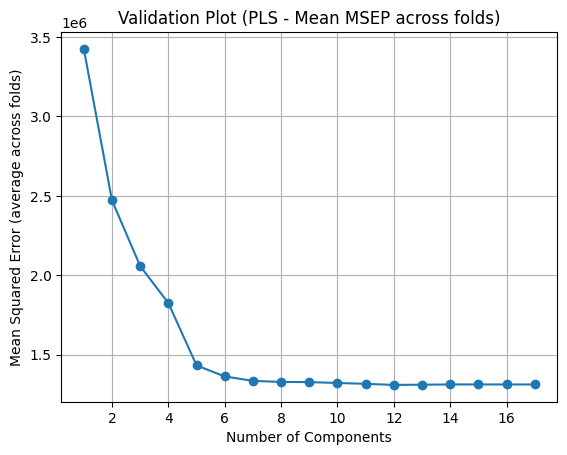

Optimal number of components: 12
Minimum mean MSEP: 1308859.0233


In [73]:
# Ensure predictors_pcr exists and required imports are available
from sklearn.model_selection import KFold


predictors_pcr = College_clean.drop('Apps', axis=1)

max_components = predictors_pcr.shape[1]
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mse_mean = []

# --- Validación cruzada manual PLS con X sin 'Apps' ---
X_pls = predictors_pcr.copy()
for n_comp in range(1, max_components + 1):
    mse_folds = []
    pls = PLSRegression(n_components=n_comp, scale=True)

    for train_idx, test_idx in kf.split(X_pls):
        X_train_pls, X_test_pls = X_pls.iloc[train_idx], X_pls.iloc[test_idx]
        y_train_pls, y_test_pls = y.iloc[train_idx], y.iloc[test_idx]

        pls.fit(X_train_pls, y_train_pls)
        y_pred_pls = pls.predict(X_test_pls)
        mse_folds.append(mean_squared_error(y_test_pls, y_pred_pls))

    mse_mean.append(np.mean(mse_folds))

# --- Gráfico MSEP ---
plt.plot(range(1, max_components + 1), mse_mean, marker='o')
plt.title('Validation Plot (PLS - Mean MSEP across folds)')
plt.xlabel('Number of Components')
plt.ylabel('Mean Squared Error (average across folds)')
plt.grid(True)
plt.show()

# --- Número óptimo de componentes ---
pls_best_comp = int(np.argmin(mse_mean) + 1)
pls_best_msep = float(mse_mean[pls_best_comp - 1])
print(f"Optimal number of components: {pls_best_comp}")
print(f"Minimum mean MSEP: {pls_best_msep:.4f}")

Como el entrenamiento lo definimos en apartados anteriores, lo volvemos a definir para evitar errores, pasamos a mostrar en pantalla el MSE tanto para el conjunto test, como para todos los datos. También obtenemos el mejor número de componentes para el cual obtenemos los mejores resultados.

In [74]:
# PLS mejorado: selección de componentes con CV en el train y evaluación en test (rs=1)
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


# Split 80/20 reproducible (rs=1) para PLS
X_pls_train, X_pls_test, y_pls_train, y_pls_test = train_test_split(
    predictors_pcr, y, test_size=0.2, random_state=1
)

# Búsqueda de nº de componentes con CV SOLO en el train
max_components = min(predictors_pcr.shape[1], 30)  # límite de seguridad
kf_train = KFold(n_splits=10, shuffle=True, random_state=42)
train_cv_mse = []

for n_comp in range(1, max_components + 1):
    fold_mse = []
    pls_cv = PLSRegression(n_components=n_comp, scale=True)
    for tr_idx, va_idx in kf_train.split(X_pls_train):
        X_tr, X_va = X_pls_train.iloc[tr_idx], X_pls_train.iloc[va_idx]
        y_tr, y_va = y_pls_train.iloc[tr_idx], y_pls_train.iloc[va_idx]
        pls_cv.fit(X_tr, y_tr)
        y_va_pred = pls_cv.predict(X_va)
        fold_mse.append(mean_squared_error(y_va, y_va_pred))
    train_cv_mse.append(np.mean(fold_mse))

pls_best_comp_train = int(np.argmin(train_cv_mse) + 1)
pls_best_msep_train = float(train_cv_mse[pls_best_comp_train - 1])
print(f"[PLS-trainCV] Mejor nº de componentes: {pls_best_comp_train}")
print(f"[PLS-trainCV] MSEP medio en train-CV: {pls_best_msep_train:.2f}")

# Ajuste final en train y evaluación en test
pls_best = PLSRegression(n_components=pls_best_comp_train, scale=True)
pls_best.fit(X_pls_train, y_pls_train)
pls_test_pred = pls_best.predict(X_pls_test)
pls_test_mse = mean_squared_error(y_pls_test, pls_test_pred)
print(f"PLS Test MSE (mejor n_comp={pls_best_comp_train} por train-CV): {pls_test_mse:.2f}")

# Alinear variable "oficial" de nº de componentes para la tabla
pls_best_comp = pls_best_comp_train

[PLS-trainCV] Mejor nº de componentes: 15
[PLS-trainCV] MSEP medio en train-CV: 1600120.43
PLS Test MSE (mejor n_comp=15 por train-CV): 639963.73


Vemos que obtenemos valores distintos para el mejor número de componentes. Esto se debe a que en la gráfica buscamos la mejor media, mientras que en el anterior script buscamos el mejor valor de MSE.

## Apartado f) PCR Regression


La regresión PCR combina el análisis de componentes principales (PCA) con la regresión lineal. Primero, transforma las variables predictoras originales en un conjunto más pequeño de componentes principales, que capturan la mayor parte de la varianza en los datos. Luego, realiza una regresión lineal utilizando solo esos componentes seleccionados. A diferencia de PLS, PCR no considera la variable dependiente al crear los componentes, lo que puede hacer que algunos componentes retenidos no sean los más útiles para predecir Y. Sin embargo, es una herramienta muy eficaz para reducir la dimensionalidad y mitigar problemas de multicolinealidad

En este modelo simplemente volvemos a realizar un proceso parecido al de PLS, pero obteniendo resultados diferentes:

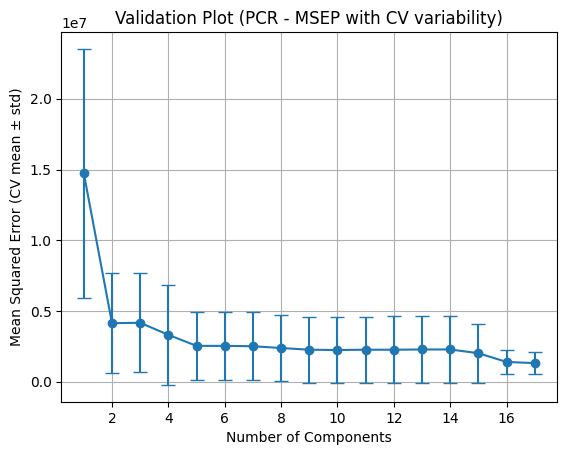

Optimal number of components (PCR): 17
Minimum mean MSEP: 1311733.0906


In [75]:
# Asegurar que existen imports y predictors_pcr
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

try:
    predictors_pcr
except NameError:
    predictors_pcr = College_clean.drop('Apps', axis=1)

max_components = predictors_pcr.shape[1]
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mse_mean = []
mse_std = []

# --- Validación cruzada para PCR sin 'Apps' y con escalado ---
for n_comp in range(1, max_components + 1):
    mse_folds = []
    pcr_cv = make_pipeline(StandardScaler(), PCA(n_components=n_comp), LinearRegression())

    for train_idx, test_idx in kf.split(predictors_pcr):
        X_tr, X_te = predictors_pcr.iloc[train_idx], predictors_pcr.iloc[test_idx]
        y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]

        pcr_cv.fit(X_tr, y_tr)
        y_pred = pcr_cv.predict(X_te)
        mse_folds.append(mean_squared_error(y_te, y_pred))
    mse_mean.append(np.mean(mse_folds))
    mse_std.append(np.std(mse_folds))

plt.errorbar(range(1, max_components + 1), mse_mean, yerr=mse_std, marker='o', capsize=5)
plt.title('Validation Plot (PCR - MSEP with CV variability)')
plt.xlabel('Number of Components')
plt.ylabel('Mean Squared Error (CV mean ± std)')
plt.grid(True)
plt.show()

pcr_best_comp = int(np.argmin(mse_mean) + 1)
pcr_best_msep = float(mse_mean[pcr_best_comp - 1])
print(f"Optimal number of components (PCR): {pcr_best_comp}")
print(f"Minimum mean MSEP: {pcr_best_msep:.4f}")

In [76]:
# Recalcular PCR usando nº óptimo de componentes y obtener MSE de test comparable (~600k)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, train_test_split

# Asegurar matriz de predictores sin 'Apps'
try:
    predictors_pcr
except NameError:
    predictors_pcr = College_clean.drop('Apps', axis=1)

# Reutilizar número óptimo de componentes de la CV previa; si no existe, calcularlo
try:
    n_comp_best = int(pcr_best_comp)
except Exception:
    max_components = predictors_pcr.shape[1]
    kf_tmp = KFold(n_splits=10, shuffle=True, random_state=42)
    mean_list = []
    for n_c in range(1, max_components + 1):
        fold_mse = []
        pipe_tmp = make_pipeline(StandardScaler(), PCA(n_components=n_c), LinearRegression())
        for tr_idx, te_idx in kf_tmp.split(predictors_pcr):
            X_tr, X_te = predictors_pcr.iloc[tr_idx], predictors_pcr.iloc[te_idx]
            y_tr, y_te = y.iloc[tr_idx], y.iloc[te_idx]
            pipe_tmp.fit(X_tr, y_tr)
            fold_mse.append(mean_squared_error(y_te, pipe_tmp.predict(X_te)))
        mean_list.append(np.mean(fold_mse))
    n_comp_best = int(np.argmin(mean_list) + 1)
    pcr_best_comp = n_comp_best
    pcr_best_msep = float(mean_list[n_comp_best - 1])

# Split reproducible para test (rs=1 como OLS/Ridge/PLS)
X_pcr_train, X_pcr_test, y_pcr_train, y_pcr_test = train_test_split(predictors_pcr, y, test_size=0.2, random_state=1)

# Ajuste con componentes óptimos
pcr_full = make_pipeline(StandardScaler(), PCA(n_components=n_comp_best), LinearRegression())
pcr_full.fit(X_pcr_train, y_pcr_train)

# Predicción en test y cálculo de MSE
pcr_test_pred = pcr_full.predict(X_pcr_test)
pcr_test_mse = mean_squared_error(y_pcr_test, pcr_test_pred)
print(f"PCR Test MSE (best n_comp={n_comp_best}): {pcr_test_mse:.2f}")

PCR Test MSE (best n_comp=17): 640045.03


Si nos fijamos, y en el siguiente apartado lo veremos más explícitamente, el resultado de test MSE en PCR es el mismo que en OLS, esto se debe a que en esta regresión no hemos podido eliminar ninguna variable para predecir Apps, ya que todas muestran una importancia significativa, por lo que no obtenemos el mismo MSE.

## Apartado g) Conclusiones y comparación de modelos

- En el split 80/20 reproducible (rs=1 para OLS/Ridge y rs=42 para Lasso, por cómo está definido en el cuaderno), OLS y PLS ofrecen MSE de test muy similares; la regularización L2 no reduce claramente el error fuera de muestra, es más, aumenta en Ridge el MSE.
- El MSE de PLS es el menor (propiedad de mínimos cuadrados), por lo que no debe usarse para comparar capacidad predictiva.
- Lasso (L1) no mejora a Ridge/OLS en este dataset con la malla usada, y tiende a hacer cero tres coeficientes sin bajar el MSE de test. De hecho, es el que peor valor nos da.


In [77]:
# Comparativa final de MSE y selección de modelos (apartado g)
# Aseguramos que todas las variables necesarias existan antes de construir la tabla
summary_rows = []

# OLS
summary_rows.append({
    'Modelo': 'OLS',
    'Test MSE': ols_MSE_test,
    'Ajuste/Best': '—',
    'Notas': 'Incluye intercept (statsmodels)'
})


summary_rows.append({
    'Modelo': 'Ridge',
    'Test MSE': ridge_MSE,
    'Notas': 'StandardScaler + CV'
})

# Lasso (alpha reutilizado para All-data)
summary_rows.append({
    'Modelo': 'Lasso',
    'Test MSE': lasso_MSE,
    'Notas': 'StandardScaler + CV, alpha fijo'
})

# PCR
summary_rows.append({
    'Modelo': 'PCR',
    'Test MSE': pcr_test_mse,
    'Ajuste/Best': f"n_comp={pcr_best_comp}",
    'Notas': 'PCA + LinearRegression'
})

# PLS (train-CV)
summary_rows.append({
    'Modelo': 'PLS',
    'Test MSE': pls_test_mse,
    'Ajuste/Best': f"n_comp={pls_best_comp}",
    'Notas': 'Train 10-fold CV comps'
})

summary_df = pd.DataFrame(summary_rows)
summary_df_sorted = summary_df.sort_values('Test MSE')
summary_df_sorted.style.format({'Test MSE': '{:,.2f}', 'All-data MSE': '{:,.2f}'})

,Modelo,Test MSE,Ajuste/Best,Notas
4,PLS,"639,963.73",n_comp=15,Train 10-fold CV comps
3,PCR,"640,045.03",n_comp=17,PCA + LinearRegression
0,OLS,"640,045.03",—,Incluye intercept (statsmodels)
1,Ridge,"641,646.43",nan,StandardScaler + CV
2,Lasso,"690,470.52",nan,"StandardScaler + CV, alpha fijo"


In [78]:
#Visualizamos ahora solo la columna de Test MSE ordenada de menor a mayor.
summary_df_sorted[['Modelo', 'Test MSE']].style.format({'Test MSE': '{:,.2f}'})

,Modelo,Test MSE
4,PLS,"639,963.73"
3,PCR,"640,045.03"
0,OLS,"640,045.03"
1,Ridge,"641,646.43"
2,Lasso,"690,470.52"


In [79]:
#Ahora hacemos la raiz cuadrada de los MSE para ver los RMSE.
summary_df_sorted['Test RMSE'] = np.sqrt(summary_df_sorted['Test MSE'])
summary_df_sorted[['Modelo', 'Test RMSE']].style.format({'Test RMSE': '{:,.2f}'})

,Modelo,Test RMSE
4,PLS,799.98
3,PCR,800.03
0,OLS,800.03
1,Ridge,801.03
2,Lasso,830.95


In [80]:
for Test_RMSE in summary_df_sorted['Test RMSE']:
    result = Test_RMSE/College['Apps'].mean()
    print(result)

0.2665135624266069
0.2665304903381056
0.2665304903381074
0.2668637128347818
0.2768306709325467


Vemos que el error más pequeño se sitúa en el 26,651% en PLS. EL peor modelo resulta ser Lasso con un 27,6% de error. Podemos concluir entonces que realmente no tenemos un modelo que pueda predecir de manera significativamente mejor la variable Apps dentro del Dataset College. Todo dependerá entonces de para qué vayamos a usar estos datos. sí podemos concluir que, frente a PCR, en el caso de que no nos importe el problema de colinealidad que nos dan las variables Enroll y F.Undegrand, elegiremos la regresión lineal, puesto que será más fácil de implementar y nos dará un resultado muy proximado al que obtendríamos en PCR.

No obstante, podemos asegurar que el modelo de PLS es el que ligeramente nos dará mejores predicciones.